In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
!pip install scikit-learn
from sklearn.preprocessing import MinMaxScaler


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
df=pd.read_csv("telecom_customer_churn.csv")

In [4]:
df.shape

(7043, 38)

In [5]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [6]:
gender_counts = df['Gender'].value_counts()

print("\nGender Counts:")
print(gender_counts)


Gender Counts:
Gender
Male      3555
Female    3488
Name: count, dtype: int64


In [7]:
region_counts = df['City'].value_counts()
print("\nRegion Counts:")
print(region_counts)



Region Counts:
City
Los Angeles         293
San Diego           285
San Jose            112
Sacramento          108
San Francisco       104
                   ... 
Eldridge              2
Holtville             2
Johannesburg          2
South Lake Tahoe      2
Jacumba               2
Name: count, Length: 1106, dtype: int64


In [8]:
df.head(5)

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [9]:
bins=[18,30,45,60,80]
labels=['18-30','31-45','46-60','61-80']
df['age_group']=pd.cut(df['Age'],bins=bins,labels=labels,right=False)

In [10]:
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason,age_group
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN,31-45
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN,46-60
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices,46-60
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction,61-80
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability,61-80


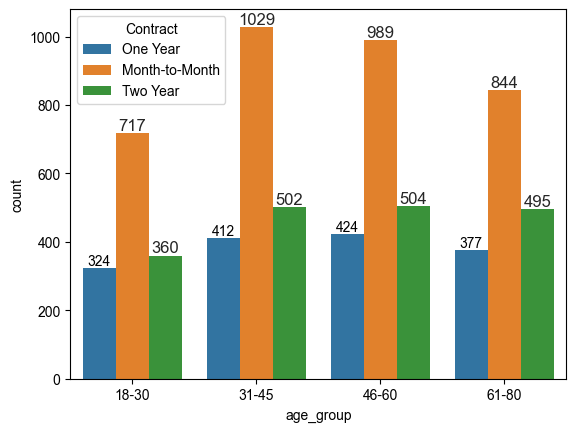

In [11]:
contract_chart=sns.countplot(data = df, x = 'age_group', hue = 'Contract')

for bars in contract_chart.containers:
    contract_chart.bar_label(bars)
    sns.set(rc={'figure.figsize':(30,8)})

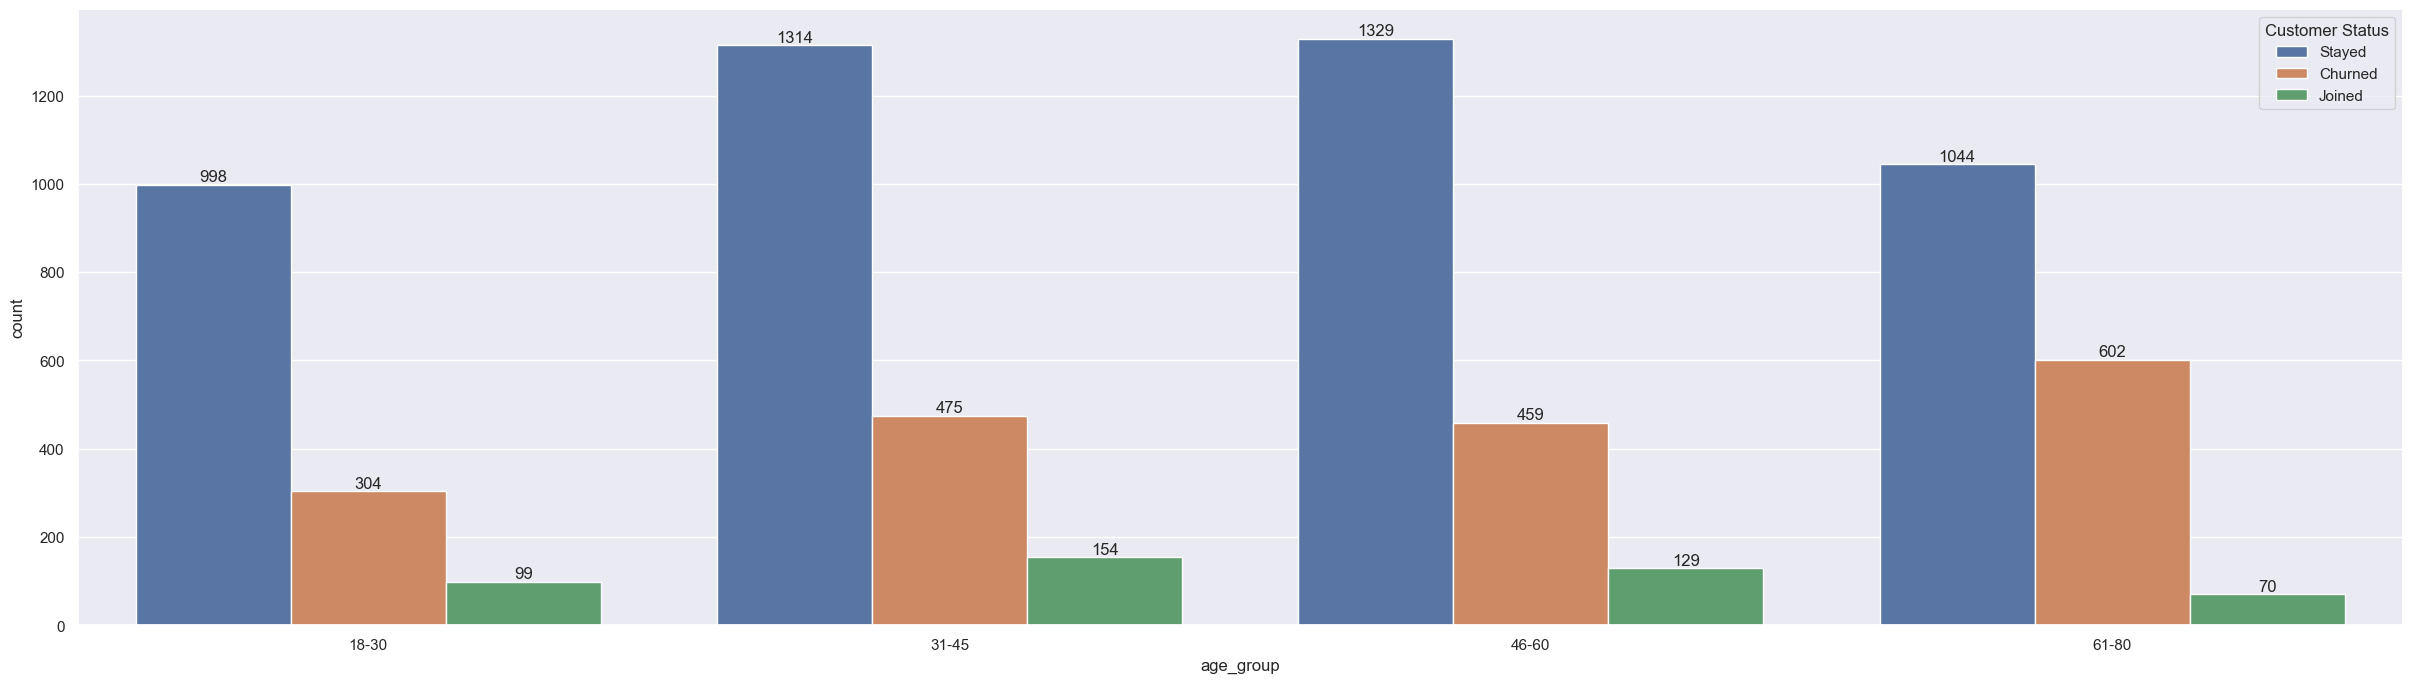

In [12]:
CS_chart=sns.countplot(data = df, x = 'age_group', hue = 'Customer Status')

for bars in CS_chart.containers:
    CS_chart.bar_label(bars)
    sns.set(rc={'figure.figsize':(30,8)})

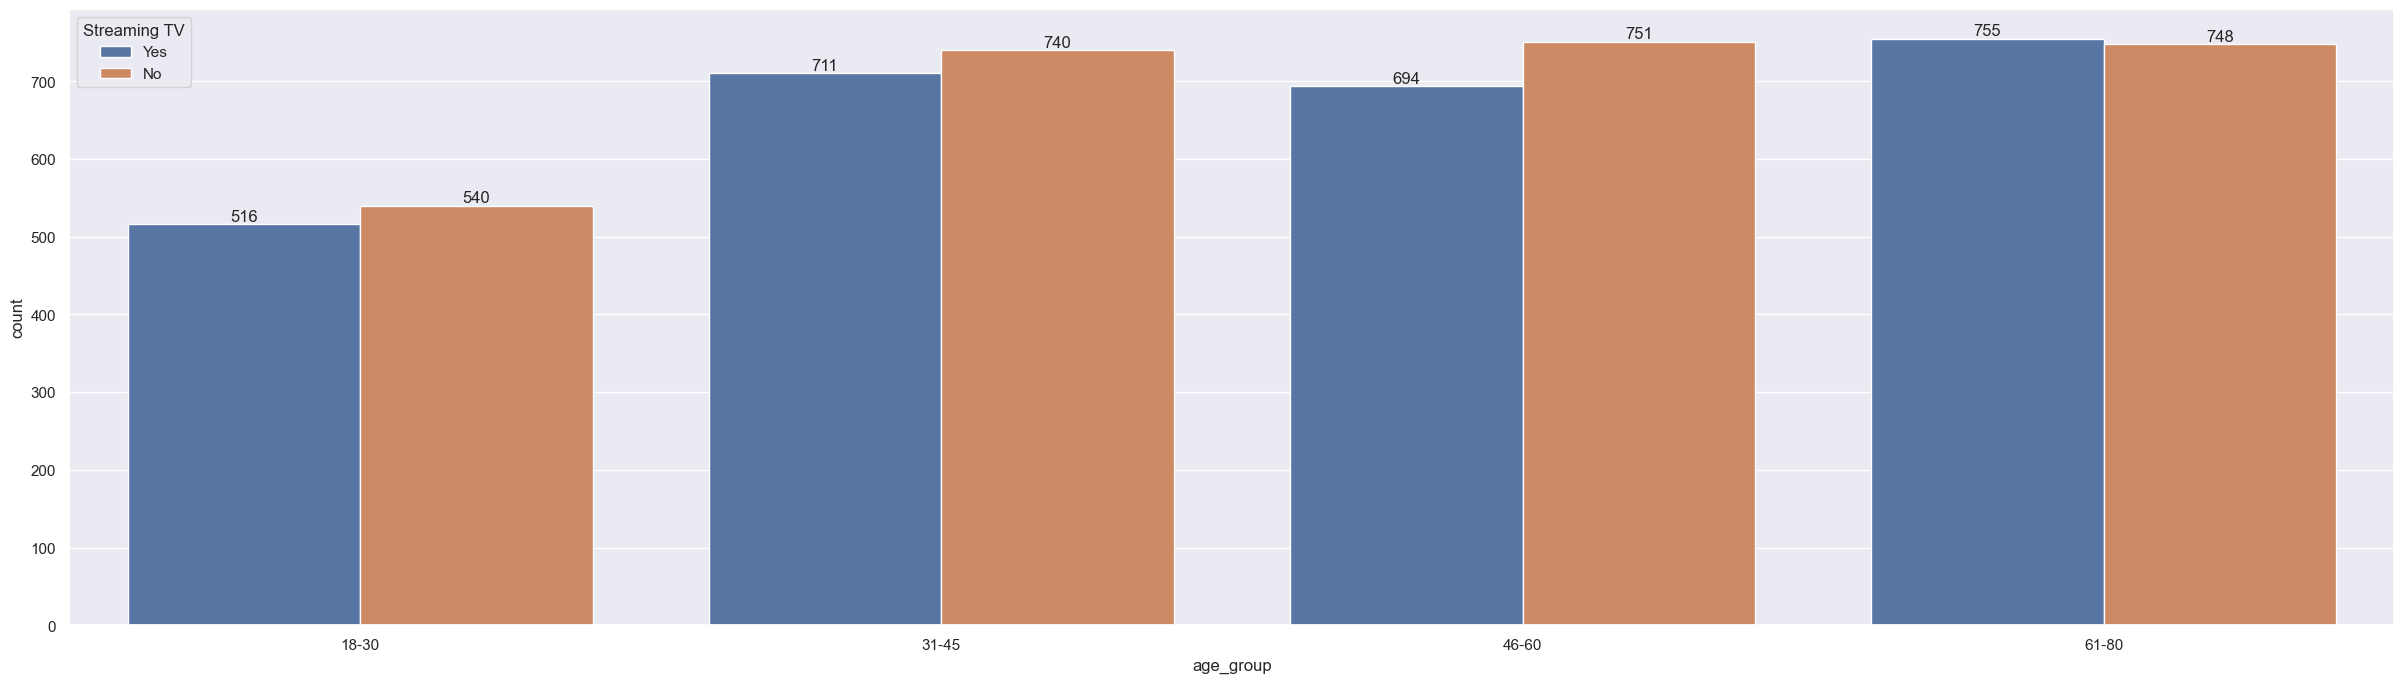

In [13]:
TV_chart=sns.countplot(data = df, x = 'age_group', hue = 'Streaming TV')

for bars in TV_chart.containers:
    TV_chart.bar_label(bars)
    sns.set(rc={'figure.figsize':(30,8)})

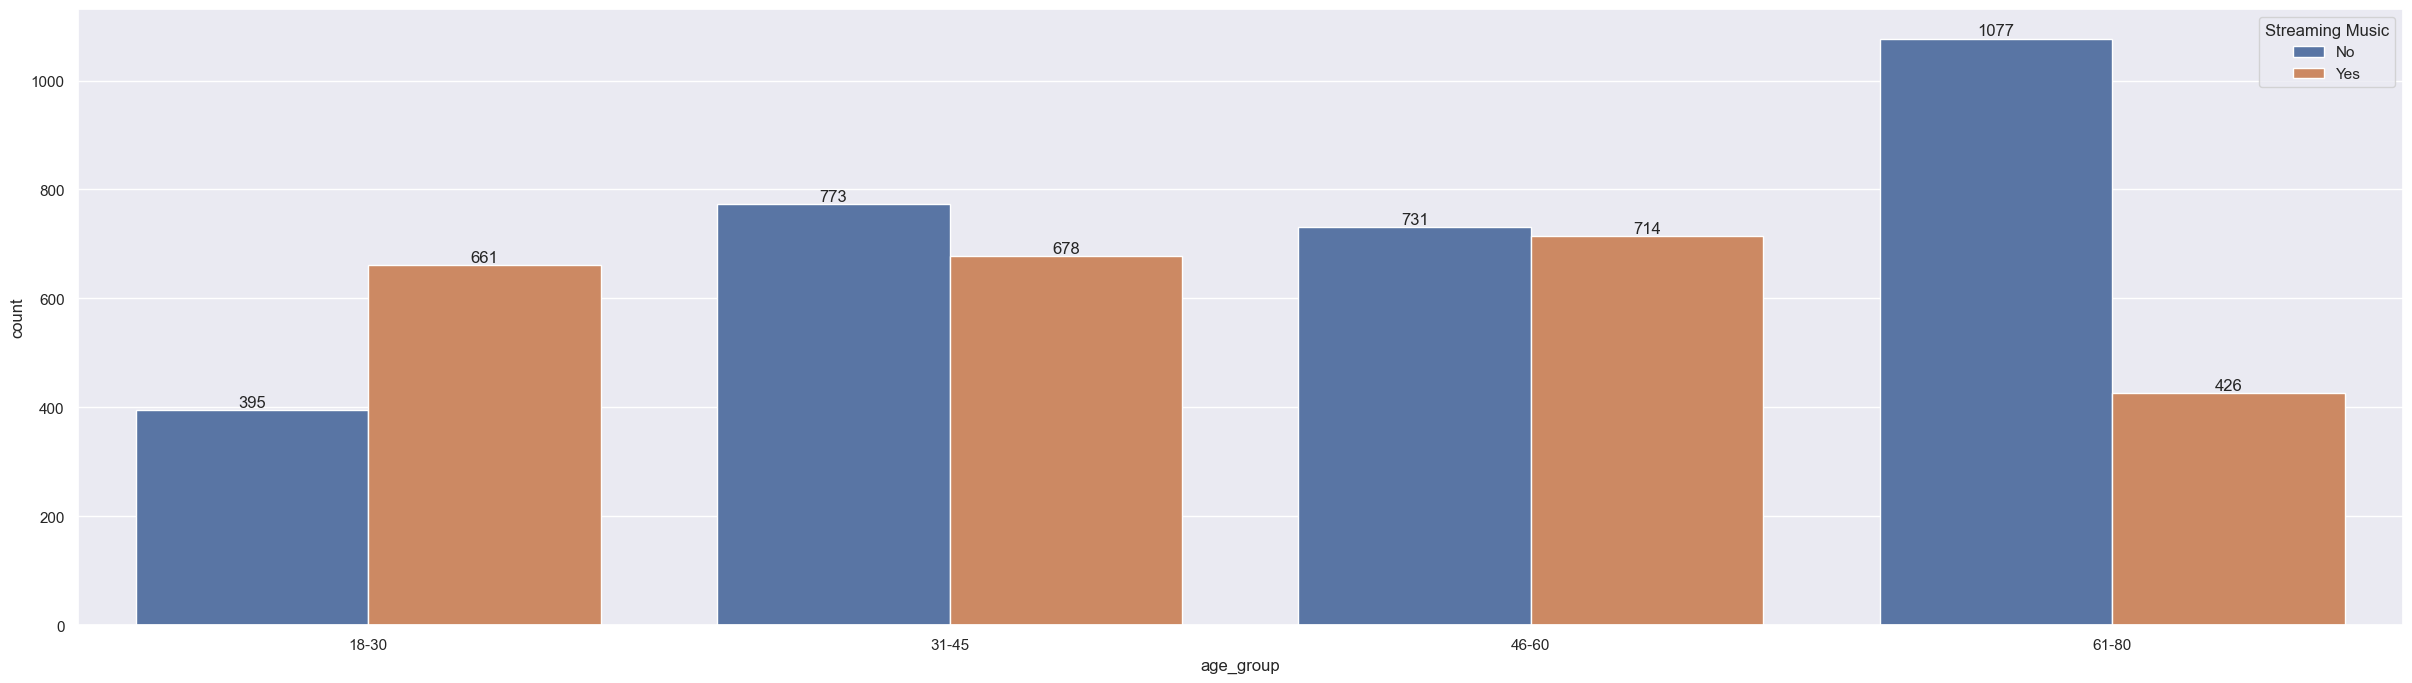

In [14]:
Music_chart=sns.countplot(data = df, x = 'age_group', hue = 'Streaming Music')

for bars in Music_chart.containers:
   Music_chart.bar_label(bars)
sns.set(rc={'figure.figsize':(30,8)})

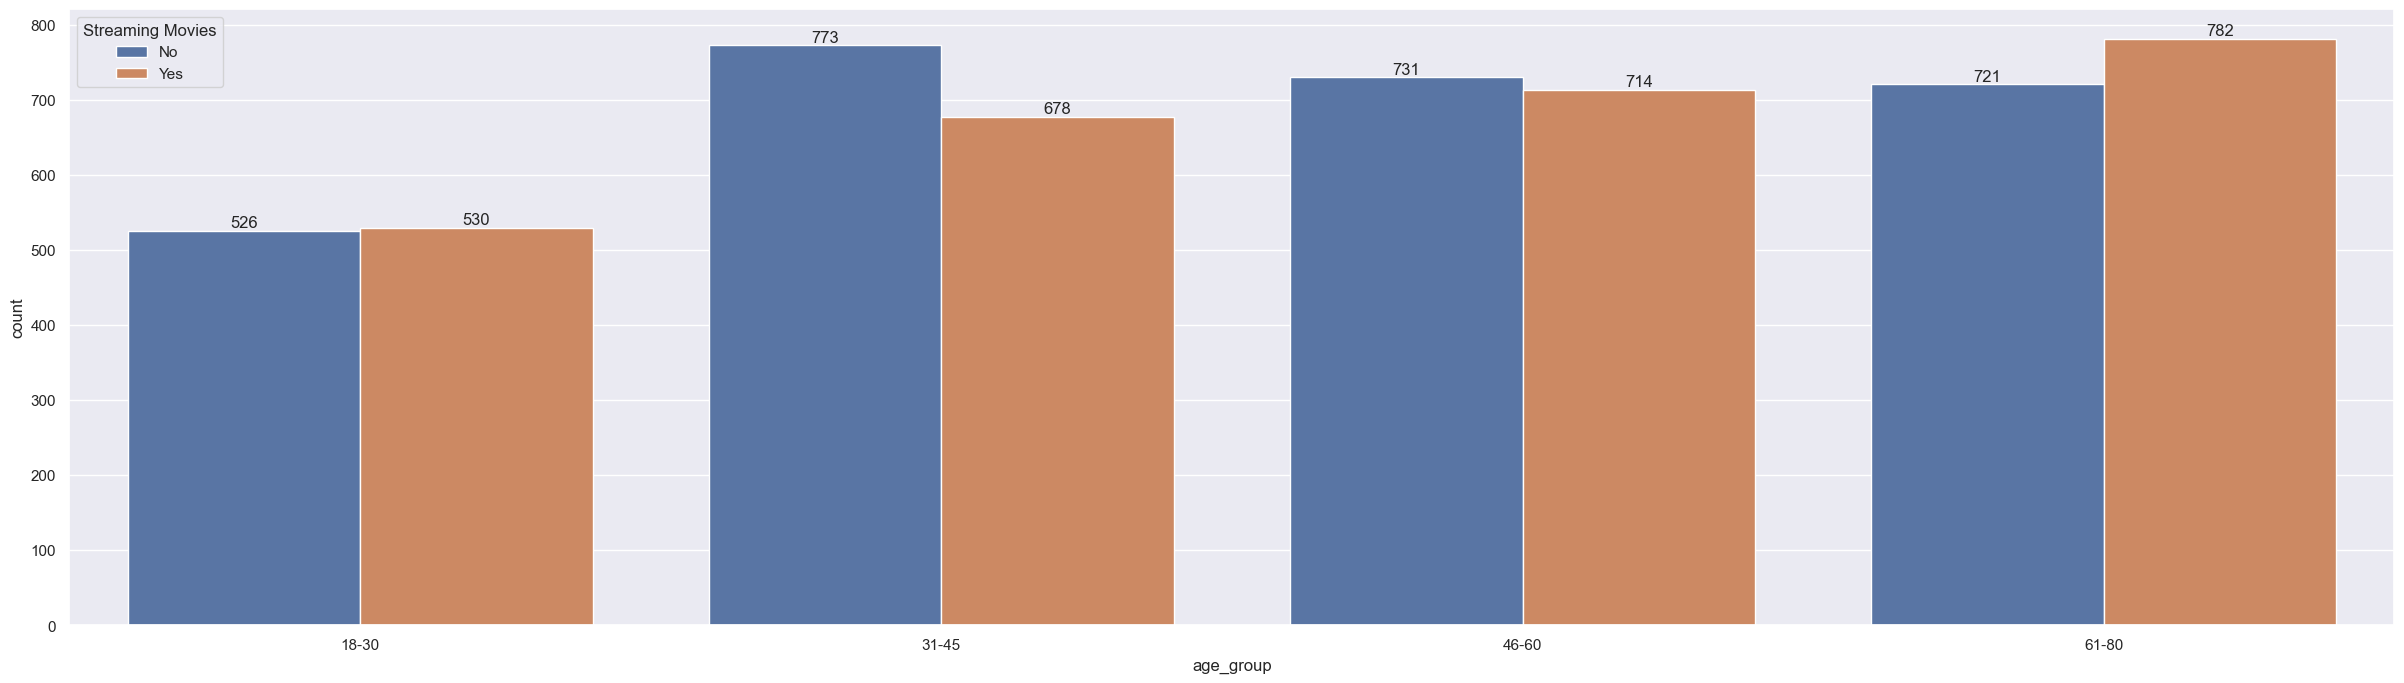

In [15]:
Movies_chart=sns.countplot(data = df, x = 'age_group', hue = 'Streaming Movies')

for bars in Movies_chart.containers:
   Movies_chart.bar_label(bars)
sns.set(rc={'figure.figsize':(30,8)})

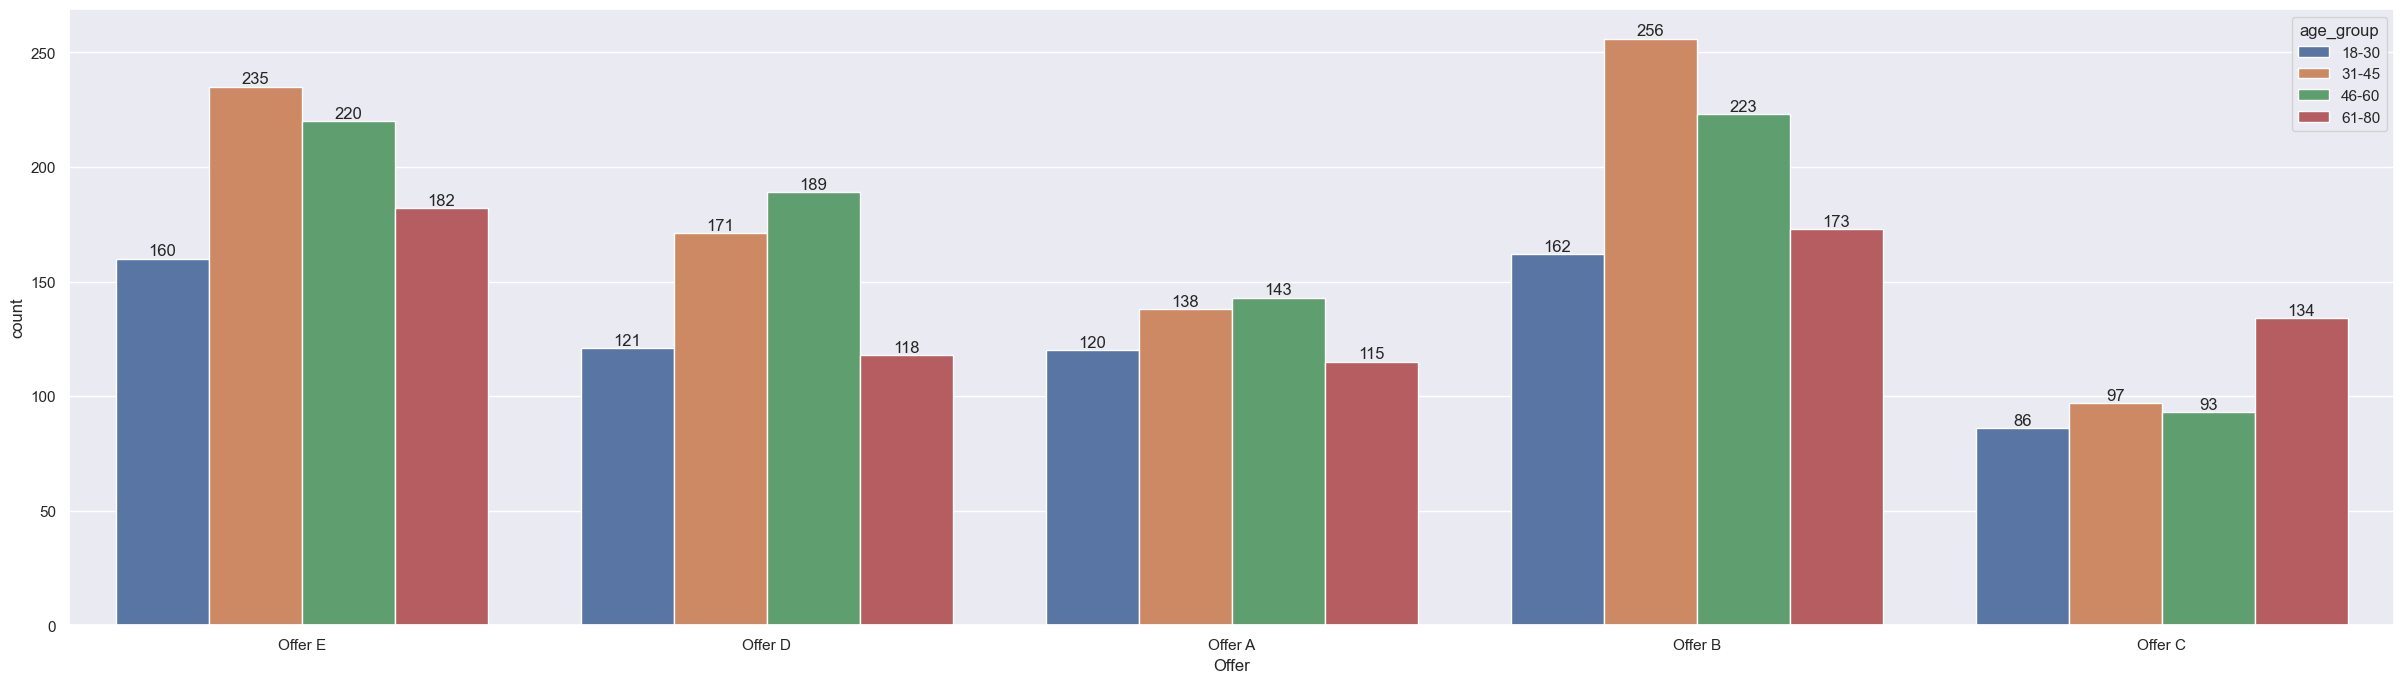

In [18]:
offer_chart=sns.countplot(data = df, x = 'Offer', hue = 'age_group')

for bars in offer_chart.containers:
  offer_chart.bar_label(bars)
sns.set(rc={'figure.figsize':(30,8)})

In [19]:
bins=[1,12,24,36,48,60,72]
labels=['1-12','13-24','25-36','37-48','49-60','61-72']

In [20]:
df['years']=pd.cut(df['Tenure in Months'],bins=bins,labels=labels,right=False)

In [21]:
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason,age_group,years
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN,31-45,1-12
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN,46-60,1-12
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices,46-60,1-12
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction,61-80,13-24
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability,61-80,1-12


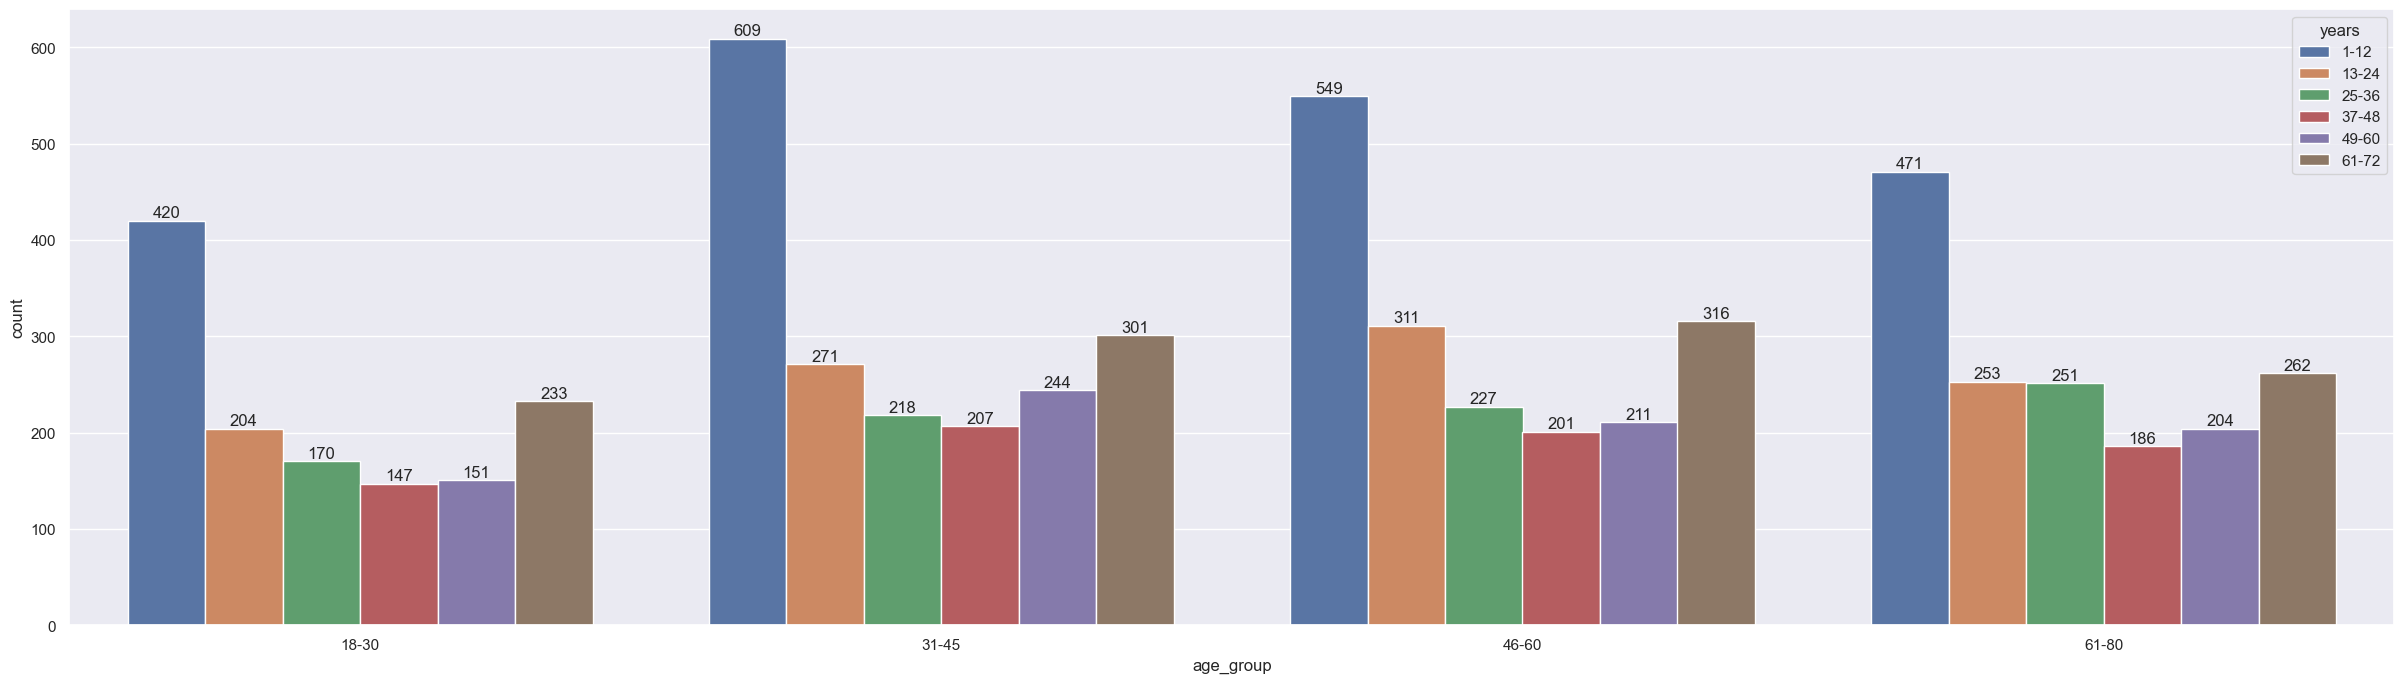

In [22]:
Tenure_Years_chart=sns.countplot(data = df, x = 'age_group', hue = 'years')

for bars in Tenure_Years_chart.containers:
   Tenure_Years_chart.bar_label(bars)
sns.set(rc={'figure.figsize':(30,8)})

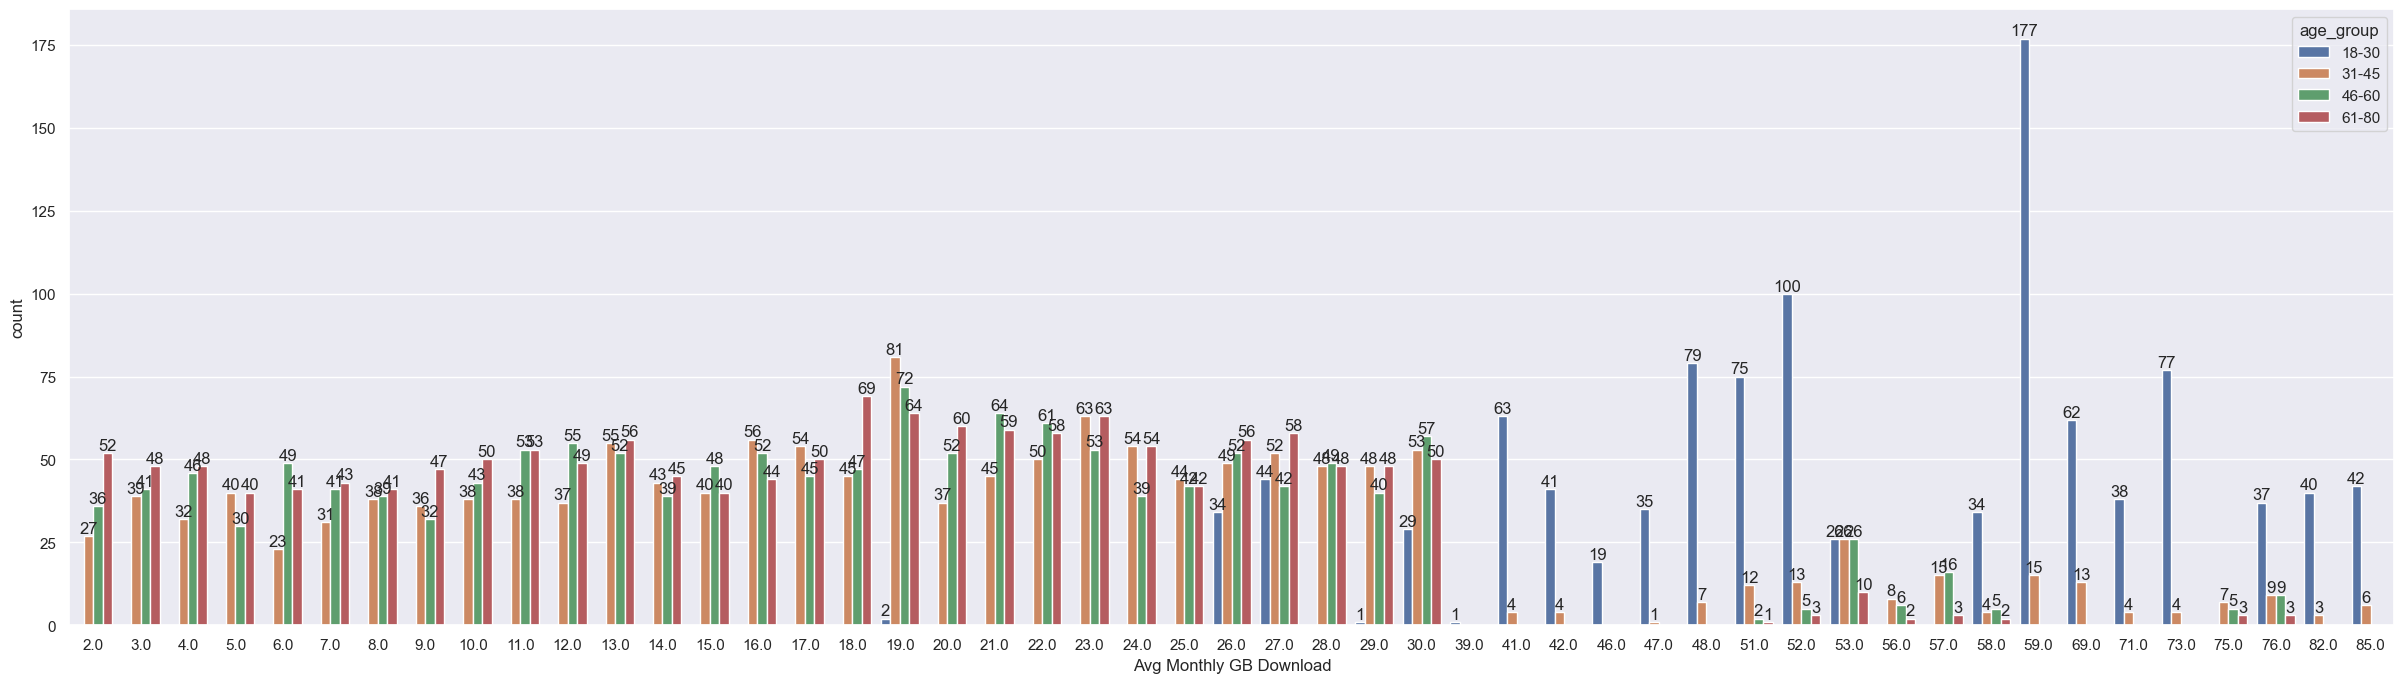

In [23]:
downloads_chart=sns.countplot(data = df, x = 'Avg Monthly GB Download', hue = 'age_group')

for bars in downloads_chart.containers:
    downloads_chart.bar_label(bars)
sns.set(rc={'figure.figsize':(45,25)})

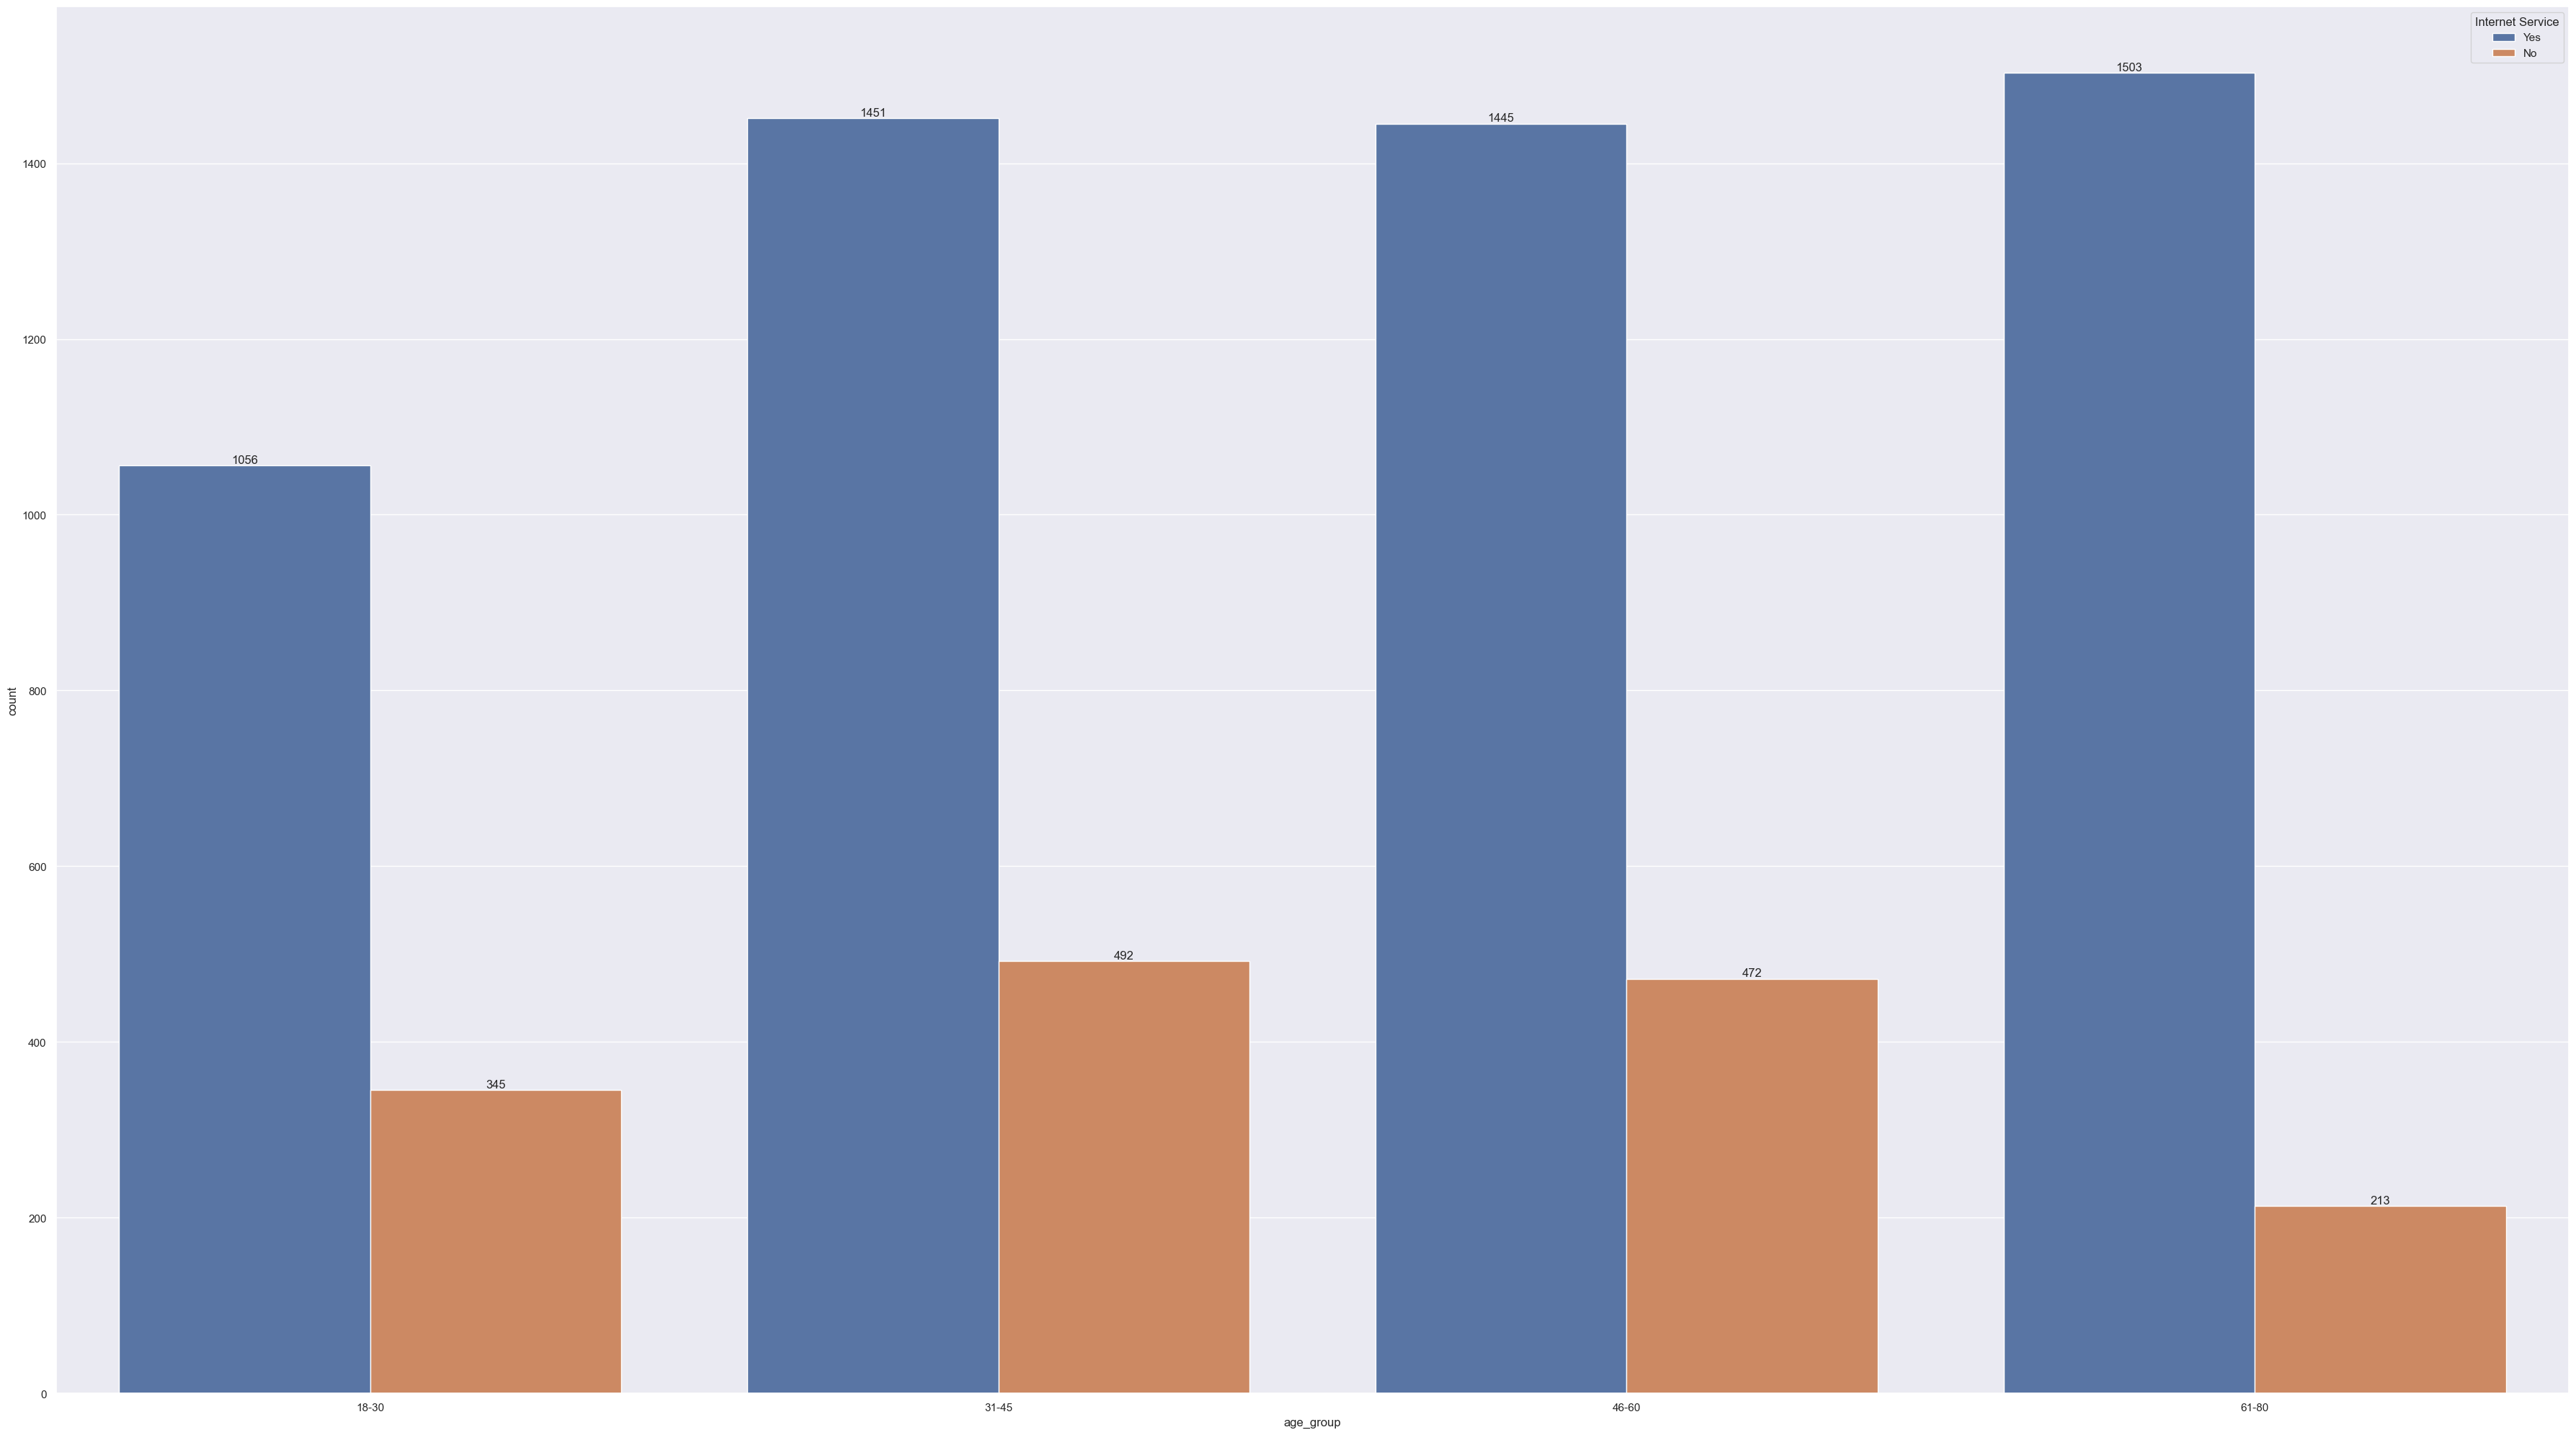

In [24]:
IS_chart=sns.countplot(data = df, x = 'age_group', hue = 'Internet Service')

for bars in IS_chart.containers:
    IS_chart.bar_label(bars)
sns.set(rc={'figure.figsize':(8,6)})

In [25]:
#most churned customer are senior adult(61-80)stayed are mature adult(46-60)the contract plan use by all the age group are monthly plans and used by middle aged adult(31-45)most streaming facilities use by each group are tie between movies and tv whereas music are not that streamed in every streaming facilities senior adults(61-80) has the highest rank of using those streams tenure in month and year are of 1 year or between 1 year and is of middle aged adult(31-45) in download chart middle aged adult(31-45) are at the highest rank of downloading data hence, middle aged adult, mature adult are top targeted customer whereas senior adult need more movie selection')

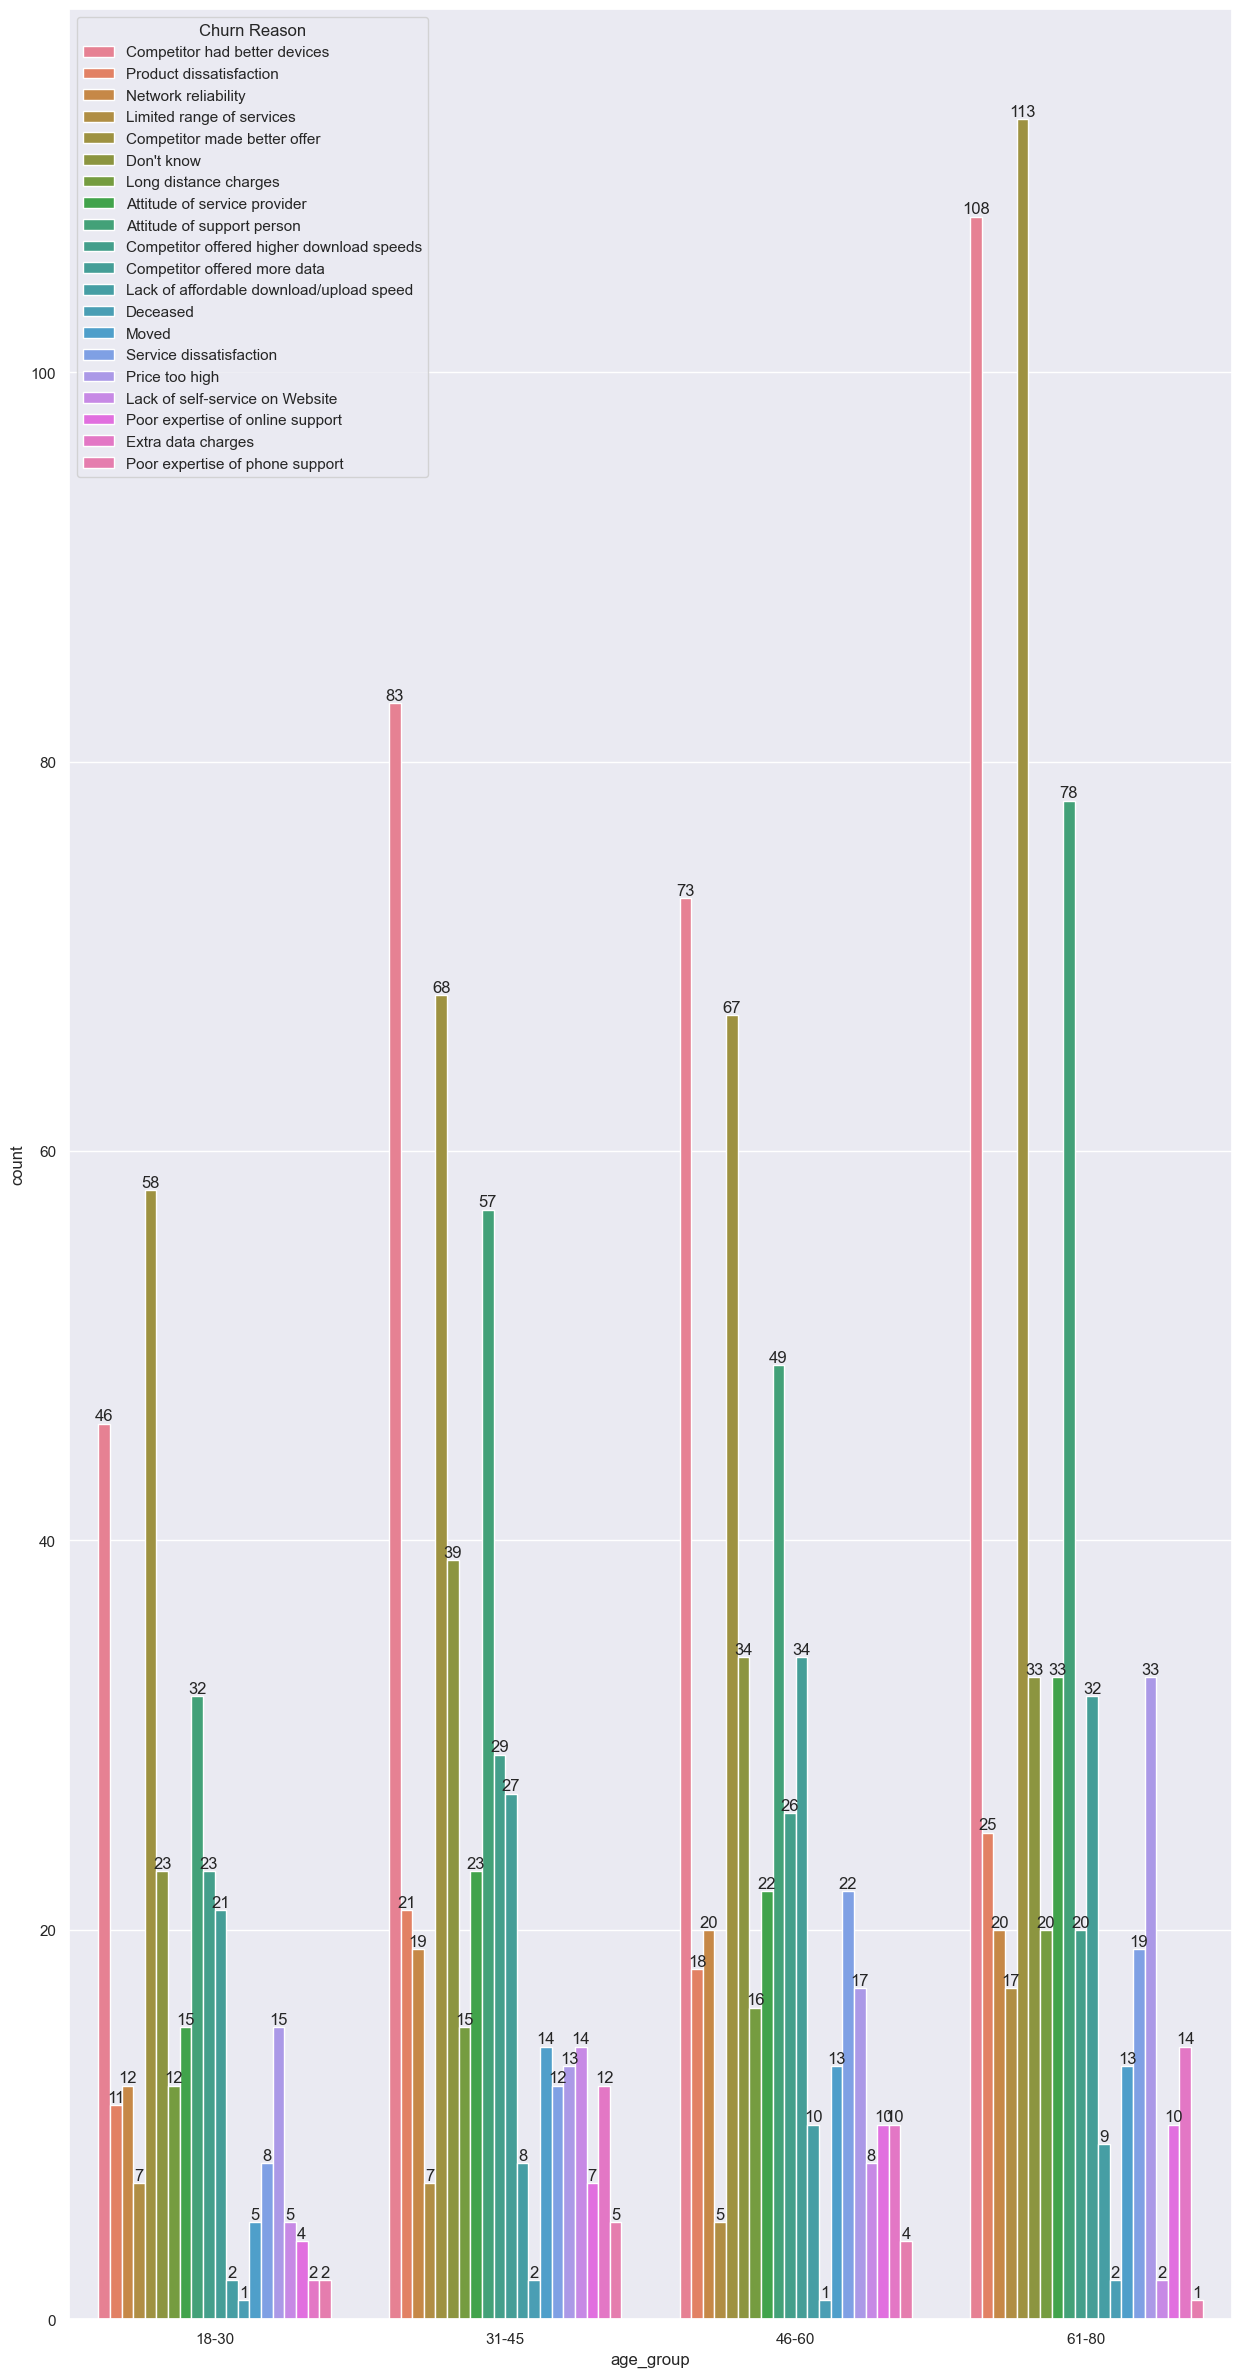

In [33]:
IS_chart=sns.countplot(data = df, x = 'age_group', hue = 'Churn Reason')

for bars in IS_chart.containers:
    IS_chart.bar_label(bars)
sns.set(rc={'figure.figsize':(15,30)})